# Atividade de 0 de Matemática Computacional

## Instalando e importando a biblioteca necessária

In [1]:
%pip install -q matplotlib
%pip install -q numpy

import matplotlib.pyplot as plt
import numpy as np
from math import ceil

## Função para desenhar vetores

In [2]:
def plot_vectors(vectors: list[np.ndarray], vectors_name: list[str] | None = None) -> None:
  colors: list[str] = ['red', 'orange', 'blue', 'purple']

  plt.figure(figsize=(7, 6))

  # variable to adapt the graphic interval
  max_value: int | float = max([abs(vector[0]) for vector in vectors])
  max_value = ceil(max([abs(vector[1]) for vector in vectors] + [max_value]) * 1.25) # scaling the graphic

  plt.xticks(np.arange(-max_value, max_value+1, 1))
  plt.yticks(np.arange(-max_value, max_value+1, 1))

  plt.xlim(right=max_value, left=-max_value)
  plt.ylim(bottom=-max_value, top=max_value)

  # X axle and Y axle
  plt.axhline(0, color='black', linewidth=1)
  plt.axvline(0, color='black', linewidth=1)

  plt.xlabel("X axle")
  plt.ylabel("Y axle")

  for i, v in enumerate(vectors):
        color: str = colors[i % len(colors)]
        name: str = f"{v}" if vectors_name is None else vectors_name[i]
        plt.quiver(0, 0, v[0], v[1],
                   angles='xy', scale_units='xy', scale=1,
                   color=color, label=name)

        pos_x: int = v[0]
        pos_y: int = v[1] + 0.2 if v[1] >= 0 else v[1] - 0.5
        plt.text(pos_x, pos_y, f"({v[0]}, {v[1]})", color=color)

  plt.grid(visible=True, linestyle="--", alpha=0.5)
  plt.legend()

  plt.plot()

## Função para aplicar transformações lineares

In [3]:
def apply_transformation(transformations: list[np.ndarray], vectors: list[np.ndarray]) -> list[np.ndarray]:
  current_vectors: list[np.ndarray] = vectors
  for transformation in transformations:
    current_vectors = list(map(lambda x: transformation @ x, current_vectors))

  return current_vectors

## Os dois vetores unitários para o espaço inicial são $\vec{x} = (1, 0)$ e $\vec{y} = (0, 1)$. Esses vetores são as bases e serão usados para demonstrar como o plano está sendo distorcido

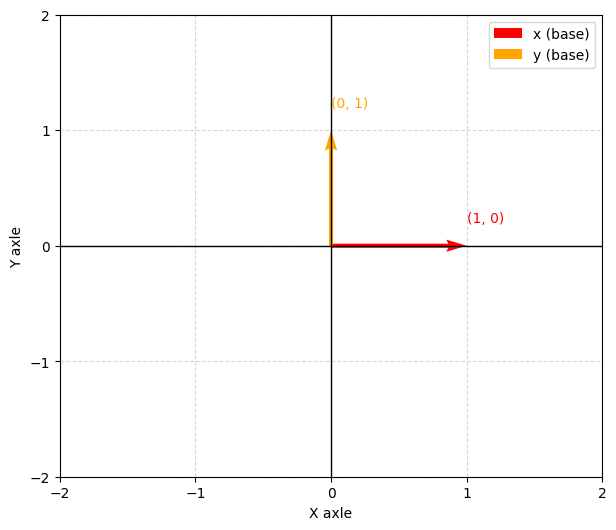

In [4]:
x_base: np.ndarray = np.array([1, 0])
y_base: np.ndarray = np.array([0, 1])

vectors_names: list[str] = ["x (base)", "y (base)", "v", "w"]

plot_vectors([x_base, y_base], vectors_names)

## Vetores arbitrários

Escolhi dois vetores arbtrários para utilizar as rotações, eles são:
$\vec{v} = (-2, -1)$ e $\vec{w} = (-3, 1)$

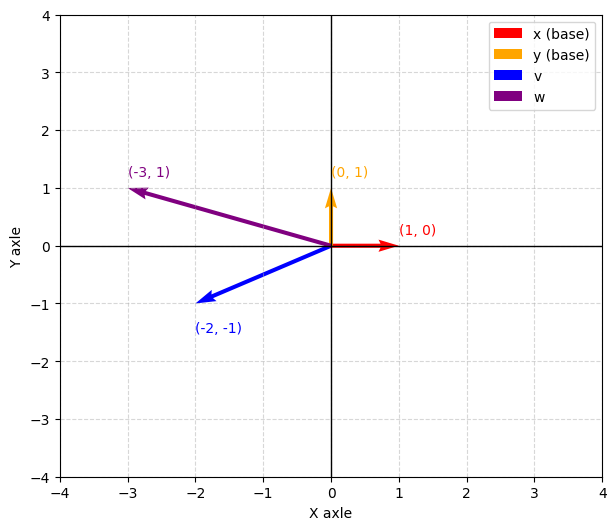

In [5]:
v_vector: np.ndarray = np.array([-2, -1])
w_vector: np.ndarray = np.array([-3, 1])

plot_vectors([x_base, y_base, v_vector, w_vector], vectors_names)

## Rotação Horária e Shear

A rotação horária pode ser demonstrada como uma transformação linear representada pela matriz
$$
Â = \left(
\begin{matrix}
0 & 1 \\
-1 & 0
\end{matrix}
\right)
$$

Em que cada coluna representa os novos vetores base $(0, -1)$ e $(1, 0)$.

Já a transformação de shear é a distorção do eixo X dada a fórmula $(x + my, y)$ onde $m$ é um escalar $\mathbb{R}$. Nesse caso eu escolherei um valor de 2 para $m$. A sua matriz transformação fica:
$$
Ĉ = \left(
\begin{matrix}
1 & m \\
0 & 1
\end{matrix}
\right)
$$
Substituindo o $m$ por 2:
$$
Ĉ = \left(
\begin{matrix}
1 & 2 \\
0 & 1
\end{matrix}
\right)
$$

In [6]:
A_rotation: np.ndarray = np.array([
    [0, 1],
    [-1, 0]
])

m: int = 2
C_shear: np.ndarray = np.array([
    [1, m],
    [0, 1]
])

Mostrando a rotação 90° com Â

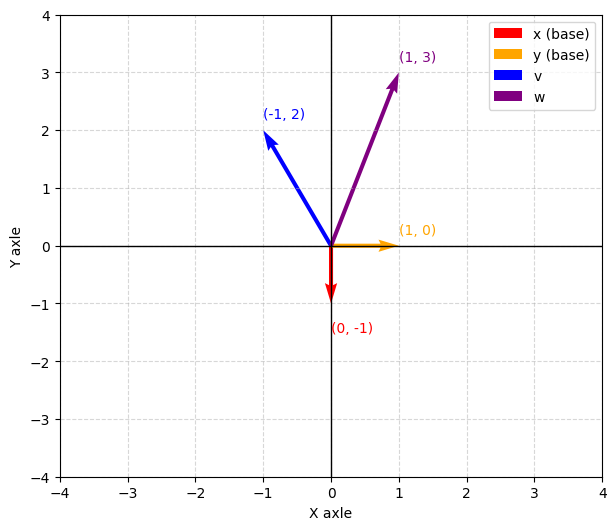

In [7]:
plot_vectors(apply_transformation([A_rotation], [x_base, y_base, v_vector, w_vector]), vectors_names)

Mostrando a transformação de cisalhamento com Ĉ

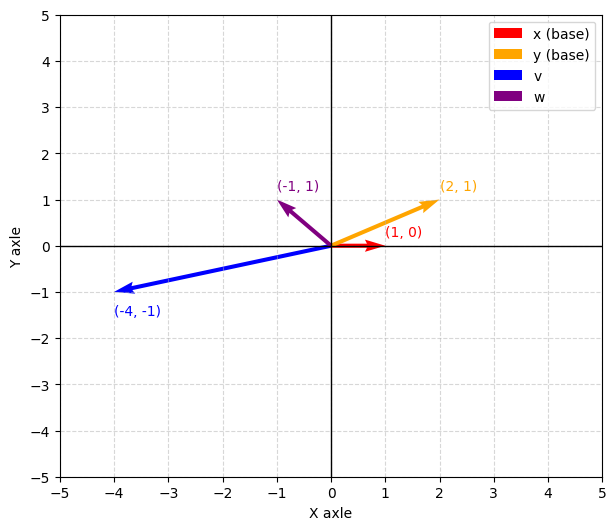

In [8]:
plot_vectors(apply_transformation([C_shear], [x_base, y_base, v_vector, w_vector]), vectors_names)

## Resultado final
Agora aplicando todas as transformações de uma vez

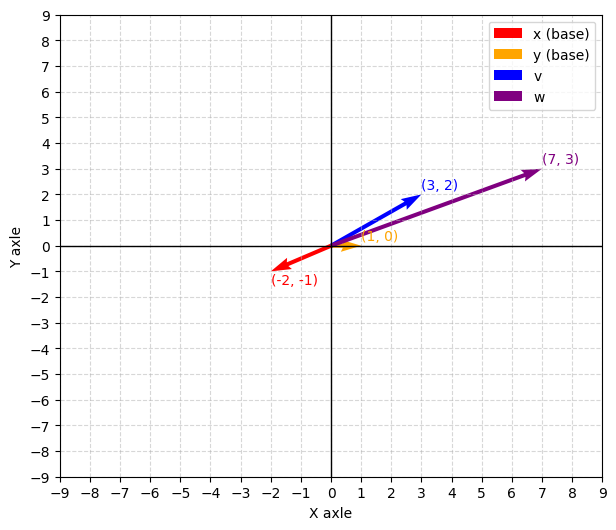

In [9]:
plot_vectors(apply_transformation([A_rotation, C_shear], [x_base, y_base, v_vector, w_vector]), vectors_names)